# Credit Card Fraud Detection

## 1. 项目概述

Kaggle页面：https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

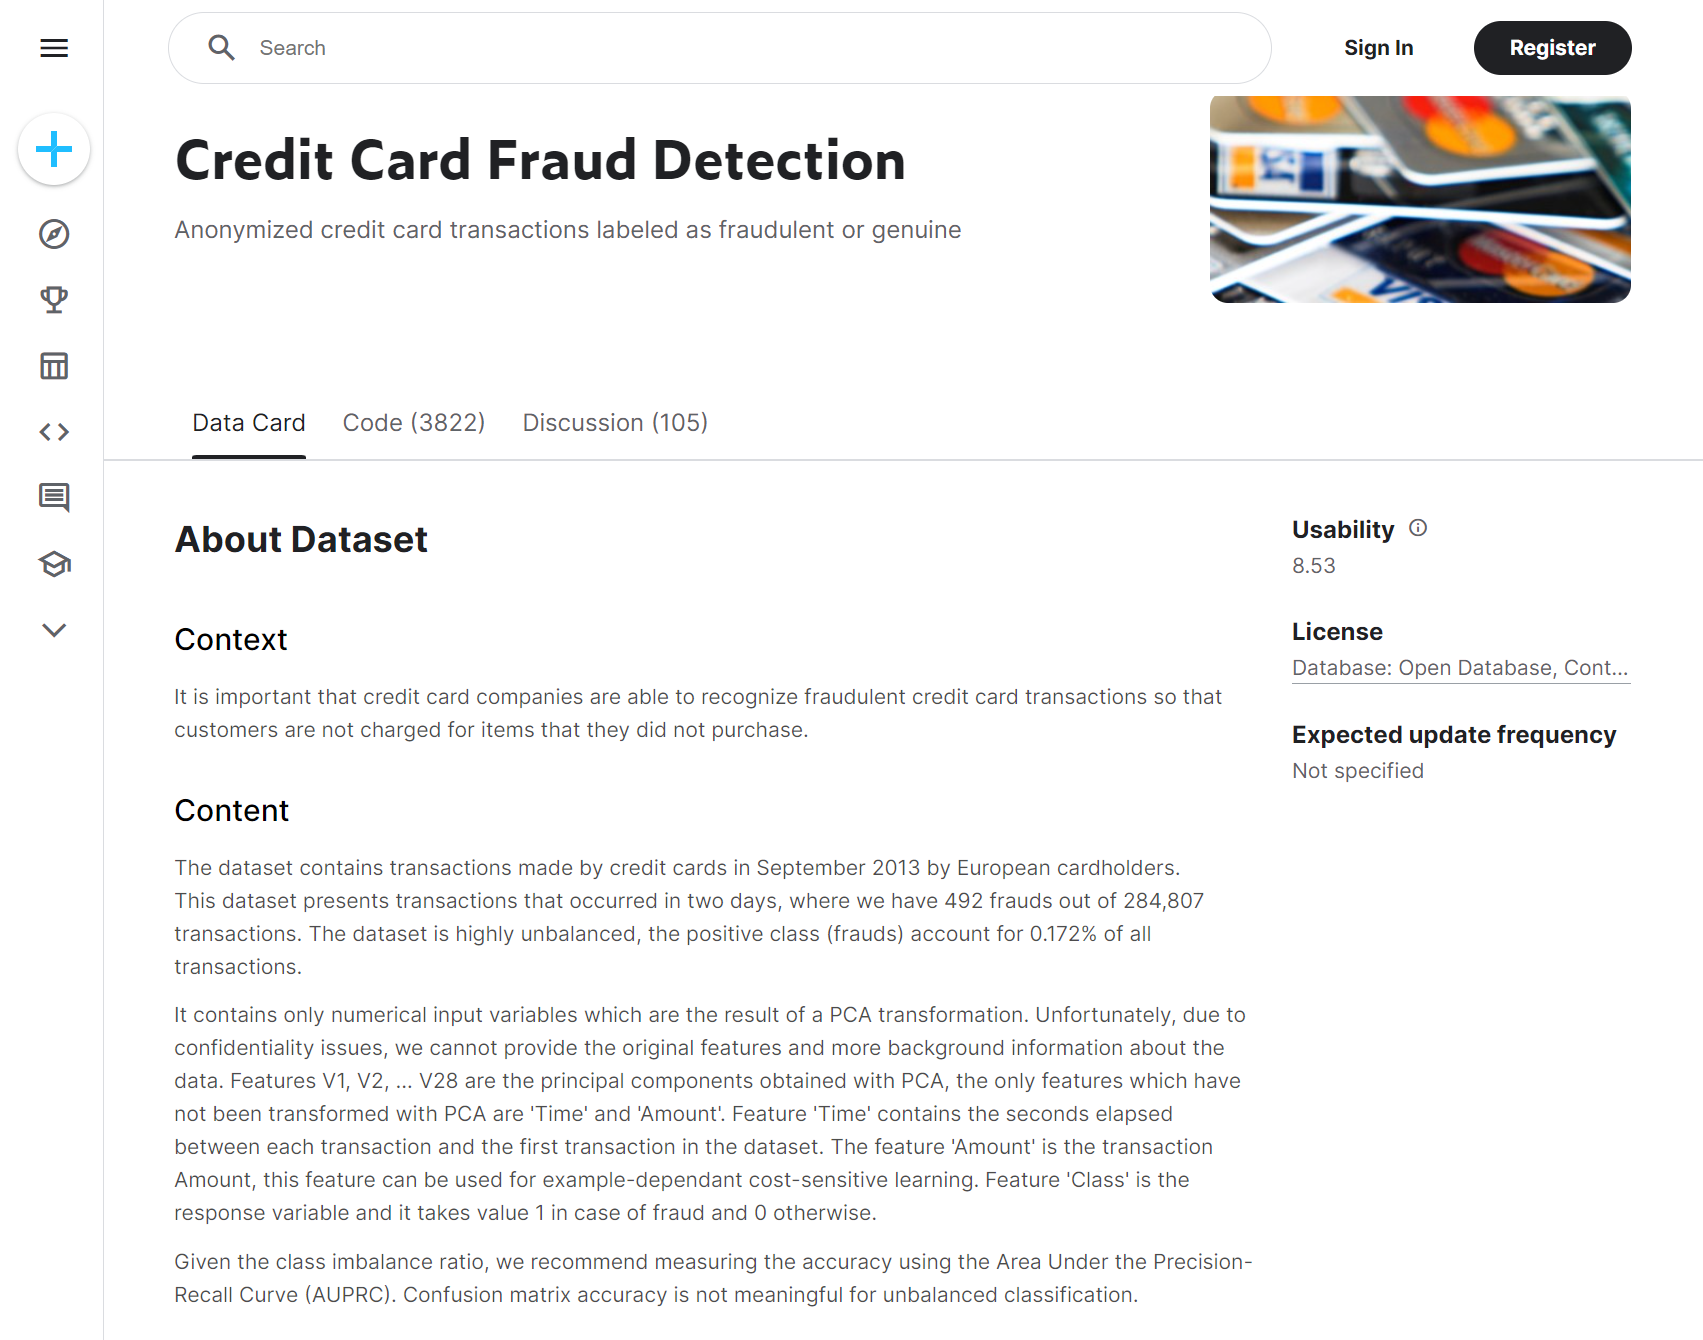

信用卡公司能够识别欺诈性的信用卡交易是非常重要的，这样客户就不会因为他们没有购买的物品而被收取费用。

## 2. 数据

该数据集包含了2013年9月欧洲持卡人的信用卡交易。该数据集显示了两天内发生的交易，其中284,807笔交易中有492笔欺诈。数据集高度不平衡，正类(欺诈)占所有交易的0.172%。

它只包含数值输入变量，这是一个PCA变换的结果。不幸的是，由于保密问题，我们无法提供原始特征和更多关于数据的背景信息。特征V1, V2，…V28是用PCA得到的主成分，唯一没有用PCA转换的特征是“时间”和“数量”。功能“时间”包含每个事务与数据集中的第一个事务之间经过的秒数。“Amount”特征是交易金额，此特征可用于依赖于示例的成本敏感学习。特征'Class'是响应变量，如果发生欺诈，它的值为1，否则为0。

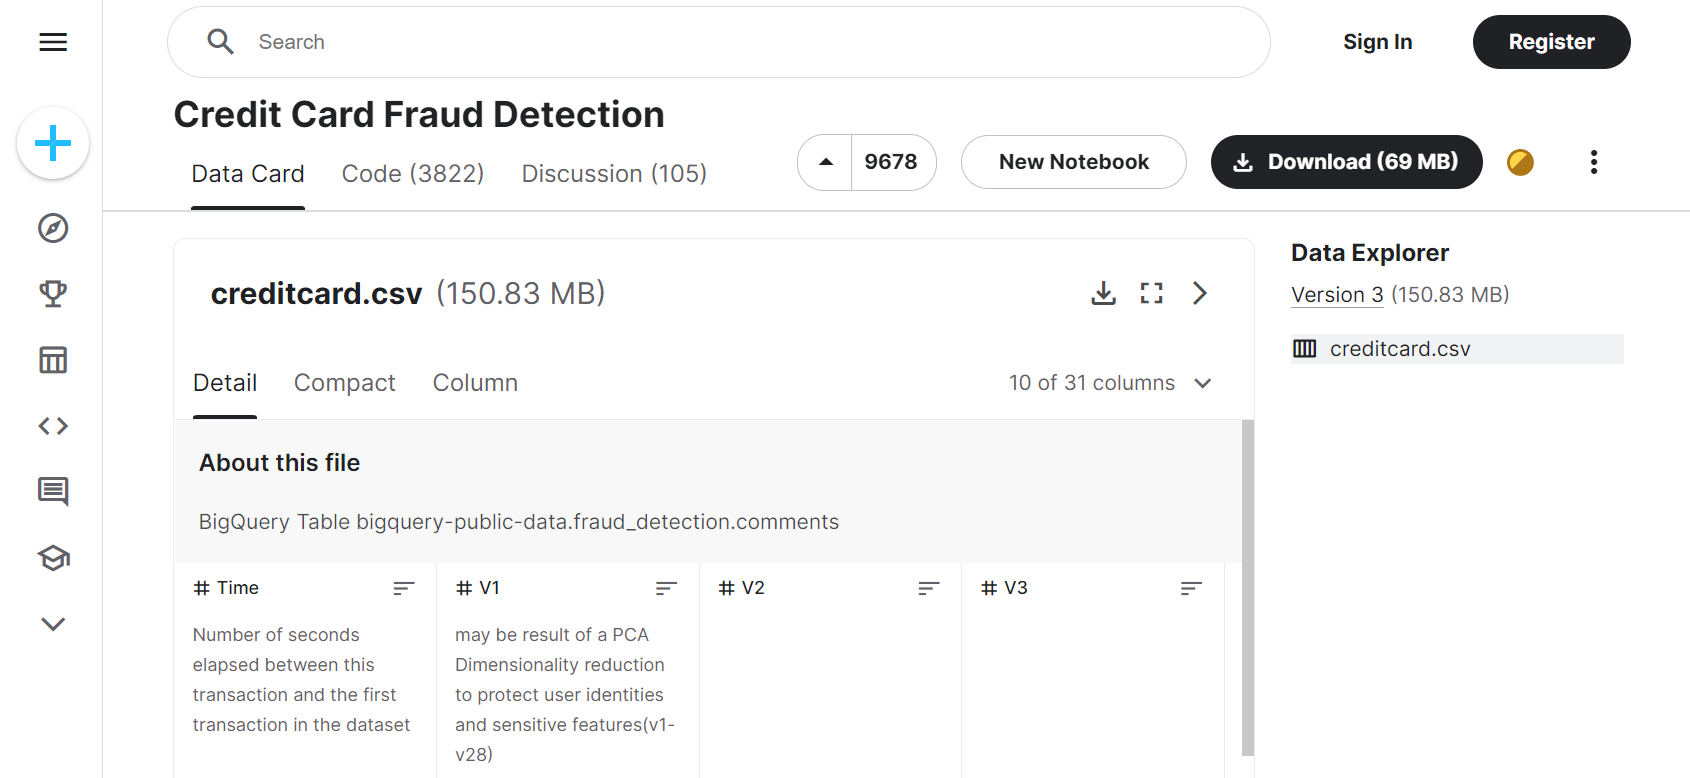

creditcard.csv - 全部数据

## 3. 代码示例

### 3.1 加载数据集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 训练集
data = pd.read_csv('./creditcardfraud/creditcard.csv')

In [2]:
data[10000:10010]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10000,15013.0,-3.172399,1.068401,0.552260,1.511408,-0.445806,-0.418135,-0.450486,0.735977,1.909130,...,-0.378948,0.466425,0.762349,0.369845,0.204650,-0.239300,0.514388,0.048350,12.99,0
10001,15014.0,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,...,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,3.79,0
10002,15015.0,-0.231725,2.392743,-2.395213,1.800040,0.602241,-1.274376,0.008175,0.726706,0.388612,...,-0.141839,-0.063205,0.264517,-0.165732,-0.481429,-0.432879,0.112854,-0.084522,0.74,0
10003,15021.0,1.109400,0.109486,1.210057,1.708824,-0.604006,0.116549,-0.440771,0.035509,2.120565,...,-0.209283,0.055162,-0.025031,0.377473,0.572143,-0.333586,0.052307,0.019847,4.99,0
10004,15022.0,-1.875349,1.767448,1.030384,-0.640395,0.122603,-0.611501,0.671789,-0.016281,1.917210,...,-0.337294,-0.177923,0.020490,0.026216,0.006750,0.237726,0.825872,0.550592,19.99,0
10005,15023.0,0.846234,-0.518066,0.080809,0.369813,-0.548741,-0.812441,0.317748,-0.331513,1.201498,...,-0.039418,-0.195537,-0.254871,0.599496,0.408009,1.029155,-0.161610,0.015456,214.00,0
10006,15036.0,-1.370269,-0.131807,2.922661,0.954350,0.463126,0.569746,0.454447,0.038272,1.849834,...,-0.449497,-0.793535,0.091274,0.023171,0.490312,-0.667323,-0.132128,-0.139099,109.99,0
10007,15040.0,-0.236908,0.848256,2.064695,1.712024,-0.367251,-0.332517,-0.016730,-0.003585,1.021921,...,0.095002,0.524425,-0.122513,0.301976,-0.410931,-0.150967,0.167372,0.155086,11.53,0
10008,15043.0,0.384377,-1.241404,0.603917,1.625190,-0.804536,0.731303,-0.207774,0.066747,1.719673,...,0.223946,0.104557,-0.559178,-0.515158,0.417438,-0.291807,-0.040745,0.083491,420.00,0
10009,15047.0,-3.419859,-3.410617,2.099400,0.210662,0.309367,-1.504223,-0.025880,0.139507,1.905996,...,0.284653,-0.359006,1.553368,0.639221,0.151947,0.776415,-0.030513,0.237019,500.00,0


### 3.2 特征归一化

In [3]:
from sklearn.preprocessing import StandardScaler

data['V29'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data[:10]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,V29
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.190107
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.019392
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.338516


### 3.3 解决样本不均衡

In [4]:
X = data.loc[:,data.columns != 'Class']
y = data.loc[:,data.columns == 'Class']

In [5]:
c0 = pd.value_counts(y['Class'], sort=True).sort_index()
c0

0    284315
1       492
Name: Class, dtype: int64

使用下采样，解决不均衡问题

In [6]:
n = len(y[y.Class == 1])
i0 = np.array(data[data.Class == 0].index)
i1 = np.array(data[data.Class == 1].index)
i0r = np.random.choice(i0, n, replace=False)
i0r = np.array(i0r)

under_sample_ind = np.concatenate([i1, i0r])
under_sample_data = data.iloc[under_sample_ind,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

### 3.4 建模评估

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

def model_selection(x, y, cv):
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression()
    svc = SVC()
    gaussian = GaussianNB()
    dt = DecisionTreeClassifier(max_depth=5)
    rf = RandomForestClassifier(n_estimators=100)
    
    score_knn = np.mean(cross_val_score(knn, x, y, cv = cv))
    score_log = np.mean(cross_val_score(lr, x, y, cv = cv))
    score_svc = np.mean(cross_val_score(svc, x, y, cv = cv))
    score_gaussian = np.mean(cross_val_score(gaussian, x, y, cv = cv))
    score_dt_clf = np.mean(cross_val_score(dt, x, y, cv = cv))
    score_rf_clf = np.mean(cross_val_score(rf, x, y, cv = cv))
    models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'SVM',
              'Naive Bayes', 'Decision Tree','Random Forest' ],
    'Score': [score_knn, score_log, score_svc, 
              score_gaussian, score_dt_clf, score_rf_clf]})
    print(models.sort_values(by='Score', ascending=False))

In [8]:
cv = 5
model_selection(X_undersample, y_undersample, cv)

                 Model     Score
1  Logistic Regression  0.940029
5        Random Forest  0.934948
0                  KNN  0.933938
2                  SVM  0.933932
4        Decision Tree  0.923744
3          Naive Bayes  0.917653


### 3.5 参数选择

In [9]:
params = {
    'C': [0.1, 0.5, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet']
}

In [10]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid=params,
    n_jobs=-1
)

In [11]:
grid.fit(X_undersample, y_undersample)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [12]:
grid.best_params_

{'C': 10, 'penalty': 'l2'}

In [13]:
grid.best_score_

0.9430798715425256

### 3.6 绘制PR曲线

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, random_state=666)

model = grid.best_estimator_
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
decision_scores = model.decision_function(X_test)

In [15]:
from sklearn.metrics import precision_recall_curve

precision_scores, recall_scores,thresholds =  precision_recall_curve(y_test,decision_scores)

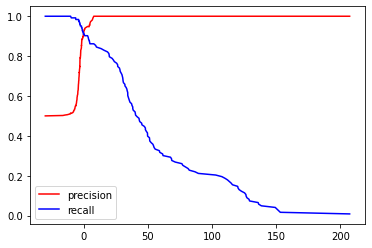

In [16]:
plt.plot(thresholds, precision_scores[:-1], color='r',label="precision")
plt.plot(thresholds, recall_scores[:-1], color='b',label="recall")
plt.legend()
plt.show()

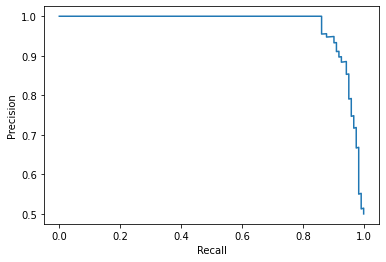

In [17]:
plt.plot(recall_scores,precision_scores)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,decision_scores)
print(auc)

0.9667525943552119


### 3.7 进一步优化

- 采用其他数据不均衡处理方法
- 对特征进行进一步分析筛选
- 尝试更多模型
- 采用集成学习方法